### 数据准备

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report

In [8]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


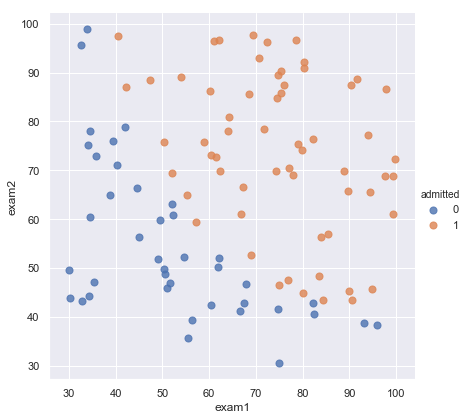

In [21]:
sns.set(context="notebook", style="darkgrid")
sns.lmplot('exam1', 'exam2', hue='admitted', data=data, height=6, fit_reg=False, scatter_kws={"s": 50})
plt.show()

#### 读取特征

In [33]:
def get_X(data):
    ones = pd.DataFrame({'ones': np.ones(len(data))})
    data = pd.concat([ones, data], axis=1)
    return data.iloc[:, :-1].values

#### 读取标签

In [35]:
def get_y(data):
    return np.array(data.iloc[:, -1])

#### 特征缩放

In [36]:
def normalize_features(data):
    return data.apply(lambda column: (column - column.mean()) / column.std())

In [37]:
X = get_X(data)
y = get_y(data)

### Sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

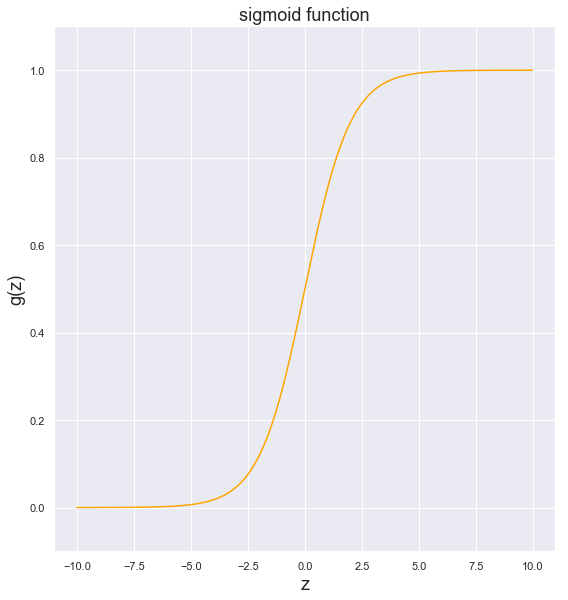

In [44]:
fig, ax = plt.subplots(figsize=(8, 9))
ax.plot(np.arange(-10, 10, step=.01), sigmoid(np.arange(-10, 10, step=.01)), color='orange')
ax.set_ylim(-.1, 1.1)
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

#### 代价函数
$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [46]:
theta = np.zeros(3)

In [47]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1- sigmoid(X @ theta)))

In [48]:
cost(theta, X, y)

0.6931471805599453

#### 批量梯度下降?todo
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m} X^T( Sigmoid(X\theta) - y )$$

In [49]:
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X@theta) - y)

In [50]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

#### 参数拟合
> * 待与手动梯度下降实现得到的结果进行对比 
> * 此处使用scipy的optimize函数计算最佳参数

In [51]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770172083584
     jac: array([1.98942032e-06, 1.34698328e-04, 1.47259166e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 30
    njev: 270
  status: 0
 success: True
       x: array([-25.16227358,   0.20623923,   0.20147921])

#### 训练集预测和验证

In [52]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob>=.5).astype(int)

In [54]:
final_theta = res.x
y_pred = predict(X, final_theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



### 寻找决策边界
> $X \times \theta = 0$  (this is the line)

In [57]:
# find the equation?
coef = -(res.x / res.x[2])
coef

array([124.88769463,  -1.0236254 ,  -1.        ])

In [58]:
x = np.arange(130, step=.1)
y = coef[0] + coef[1]*x

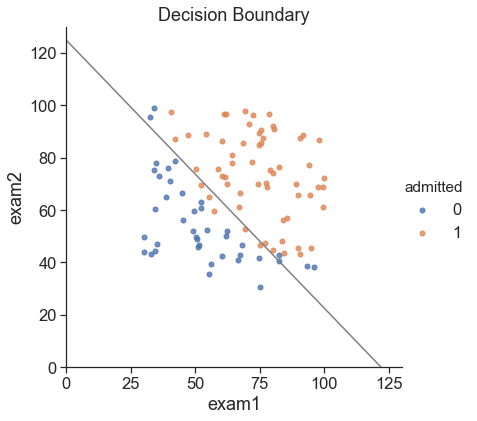

In [66]:
sns.set(context='notebook', style='ticks', font_scale=1.5)
sns.lmplot('exam1', 'exam2', hue='admitted', data=data, height=6, fit_reg=False, scatter_kws={'s': 25})
plt.plot(x, y, 'grey')
plt.title("Decision Boundary")
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.show()

### 正则化逻辑回归?todo

#### 代价函数
$$\begin{align}
  & J\left( \theta  \right) =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} + \dfrac {\lambda }{2m}\sum ^{i}_{j=1}\theta ^{2}_{j}\\ 
\end{align}$$

In [71]:
def cost_reg(theta, X, y, rate):
    frist_part = np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1- sigmoid(X @ theta)))
    second_part = np.mean(theta.T @ theta) * (rate / 2)
    return first_part + second_part

In [67]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


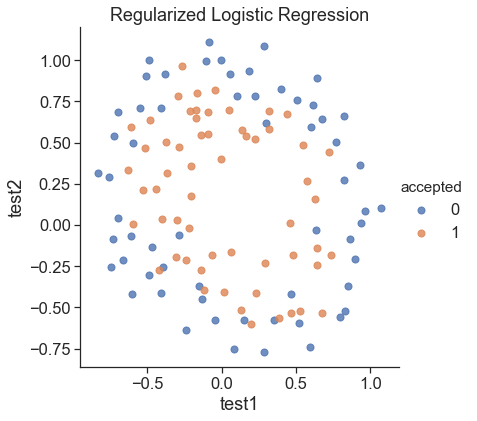

In [68]:
sns.set(context='notebook', style='ticks', font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, height=6, fit_reg=False, scatter_kws={'s':50})

plt.title('Regularized Logistic Regression')
plt.show()

### 特征映射 -- Feature Mapping
![1](./mapped_feature.png)

特征个数为： 1 + ... + power + (power + 1)
> * power = 2, 个数为 1 + 2 + 3 = 6
> * power = 3, 个数为 1 + 2 + 3 + 4 = 10

In [82]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {
        f"{i-p}{p}": np.power(x, i-p) * np.power(y, p)
        for i in np.arange(power+1)
        for p in np.arange(i+1)
    }
    
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [73]:
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [75]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [83]:
data = feature_mapping(x1, x2, power=2)
print(data.shape)
data.head()

(118, 6)


,00,10,01,20,11,02
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821


In [85]:
data.describe()

,00,10,01,20,11,02
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659
